<a href="https://colab.research.google.com/gist/oserikov/f430e81939ffff48cafd6377b9e67b9c/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание о векторизации текстов

В задании вам предстоит сравнить несколько методов снижения размерности
* PCA
* t-SNE

а так же попробовать осуществить тематическое моделирование методом LDA.

**Формат сдачи задания** -- указание в гуглформе ссылки на тетрадь с решением + ответ на вопросы (см. последние вопросы первой задачи) в форме. Форма появится ближе к дедлайну.

**Дедлайн** 23.59 7 октября MSK.  

ДЗ предполагает возможность получения **до 12 баллов** по десятибалльной шкале. Оценки 11 и 12 поступают в ведомость, как оценки 11 и 12.

---

Если вы уже хорошо знакомы с снижением размерности, реализуйте первую задачу, используя не Bag-of-Words векторы текстов, а эмбеддинги текстов, полученные алгоритмом на ваш выбор. 
**Если вы собираетесь решать задачу так, то, приступая, сообщите об этом @oserikov в телеграме.**

Если вы уже хорошо знакомы ещё и с векторизацией текстов эмбеддингами, напишите @oserikov для обсуждения замены первой задачи на другую.


# [6 баллов] Задача о снижении размерности




[Вот](https://drive.google.com/drive/folders/1HX5rz4UZHtbzhPguUFolOg-xm6HFc0KO?usp=sharing) корпус, однажды собранный без особенных размышлений.
Это -- корпус любительской литературы. Он был собран для забавы и непонятно, какая природа у представленных там текстов.

Вам предстоит оценить, насколько эти тексты интересны в качестве простого датасета для задачи классификации: информативны ли Bag-of-Words векторы в смысле разделения текстов по жанрам.

---

### Постановка задачи

**Задача**: взяв фанифики и два каких-то других жанра из корпуса, визуализировать их BoW-представления на плоскости.

---

Визуализацию стоит осуществлять scatter-плотом, информацию о принадлежности документа какому-то жанру стоит передавать цветом.

Количество документов, представляющих каждый жанр, стоит подобрать семплированием нужного количества элементов под доступные вычислительные ресурсы -- полный корпус точно слишком велик.

Гиперпараметры BoW-векторизатора стоит подобрать под доступные вычислительные ресурсы -- если код работает дольше часа, то стоит упростить вычислительную задачу: подобрать другие гиперпараметры векторизации или уменьшить выборку.

#### Критерии


* **1 БАЛЛ**: 
  * В выбранных документах осуществлена какая-то **стандартная предобработка текста**: удалены стоп-слова и мусорные токены (e.g. html-теги), проведена лемматизация.  
  Решение о каждой конкретной детали предобработки остаётся на усмотрение студентов: каждое нестандартное действие (e.g. отказ от лемматизации или удаление каких-то особенных токенов) стоит пояснить коротким комментарием, описывающим мотивацию.
  * Получены **Bag-of-Words векторы** документов, выбранных для исследования. 
* **1 БАЛЛ**: получена визуализация документов на плоскости **методом главных компонент** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: получена визуализация документов на плоскости методом **t-SNE** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: на полученных визуализациях **получилось передать цветом точек классы** документов; понятно, точка какого цвета относится к какому классу.


Скорее всего визуализация t-SNE и PCA заметно отличаются раскладкой точек по плоскости: один метод как будто раскладывает их вдоль двух пересекающихся прямых, за другим такого свойства скорее всего нет. Ответ на два вопроса ниже вам предстоит указать в гуглформе, сдавая задание.
* **1 БАЛЛ**: верно указано, какой метод укладывает точки примерно вдоль прямых, а какой -- нет
* **1 БАЛЛ**: предложено верное описание тому, почему у одного из методов всегда результаты располагаются вдоль некоторых прямых. 



#### Примеры кода

Использование t-SNE и PCA для визуализации векторов: [ссылка](https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans).





## Выполнение

### Препроцессинг и лемматизация текста

In [36]:
import re

In [40]:
from razdel import sentenize, tokenize
from nltk.corpus import stopwords
from string import punctuation

stop = set(stopwords.words("russian"))

In [2]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [37]:
def tokenization(text):
    text = re.sub(r'\n', ' ', text).lower()
    tokens = list(tokenize(text))
    return [token.text for token in tokens if token.text not in stop 
                                           and token.text not in punctuation
                                           and len(token.text) > 1]

In [38]:
def lemmatization(text):
    tokens = tokenization(text)
    lemmas = [morph.parse(word)[0].normal_form for word in tokens]
    return ' '.join(lemmas)

### Создание датафрейма из обработанных текстов, разделённых по жанрам

In [4]:
import os
import pandas as pd

In [8]:
dirnames = ['Фанфик', 'Драматургия', 'Киберпанк']

In [ ]:
df = pd.DataFrame(columns=['text', 'filepath', 'genre'])

In [41]:
cur_dir = os.getcwd()

filepaths = []
texts = []
for dirname in dirnames:
    filepath = os.path.join(cur_dir, dirname)
    for root, dirs, files in os.walk(filepath):
        for name in files[:150]:
            filename = os.path.join(root, name)
            with open(filename, 'r', encoding='utf-8') as f:
                text = f.read()
                texts.append(lemmatization(text))
                filepaths.append(filepath)

In [42]:
df['text'] = texts
df['filepath'] = filepaths

In [64]:
for i, row in df.iterrows():
    if 'Фанфик' in row['filepath']:
        row['genre'] = 'fanfiction'
    elif 'Драматургия' in row['filepath']:
        row['genre'] = 'drama'
    else:
        row['genre'] = 'cyberpunk'

In [65]:
df.head(10)

,text,filepath,genre
0,ленточка фанфик роман андрей круз земля лишний...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
1,mass effect while the reaper назвый mass effec...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
2,дмитрий крам s-t-i-k-s подкидыш улья андрей пр...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
3,дмитрий крам исчезнуть клан фанфик играть жить...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
4,содержание часть акклиматиазия часть полёт ......,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
5,хогвартс-экспресс выть словно запереть клетка ...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
6,**********************************************...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
7,алиса глава покойник рота спать рота подъесть ...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
8,глава это такой существовать значит воспринять...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction
9,пока решать вернуть разговор прежний русло све...,C:\Users\AleksandraB\CompLing\hw\Фанфик,fanfiction


### Векторизуем тексты

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vectorizer = TfidfVectorizer(max_features=20000)
X = vectorizer.fit_transform(df['text'])

### Визуализируем

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [69]:
pca = PCA(n_components=2)

In [70]:
principalComponents = pca.fit_transform(X.todense())
df_pca = pd.DataFrame(data = principalComponents, 
                      columns = ['сomponent 1', 'сomponent 2'])

In [81]:
pca_final = pd.concat([df_pca, df[['genre']]], axis = 1)

In [82]:
pca_final.head(15)

,сomponent 1,сomponent 2,genre
0,0.138107,-0.010058,fanfiction
1,-0.265419,0.007217,fanfiction
2,-0.000526,-0.008578,fanfiction
3,0.318106,-0.106058,fanfiction
4,-0.264941,-0.002173,fanfiction
5,-0.057680,-0.158435,fanfiction
6,0.235143,0.046479,fanfiction
7,0.313632,0.011147,fanfiction
8,0.104467,-0.064860,fanfiction
9,-0.099042,0.050099,fanfiction


### Визуализация документов на плоскости методом PCA снижения размерности Bag-of-words векторов

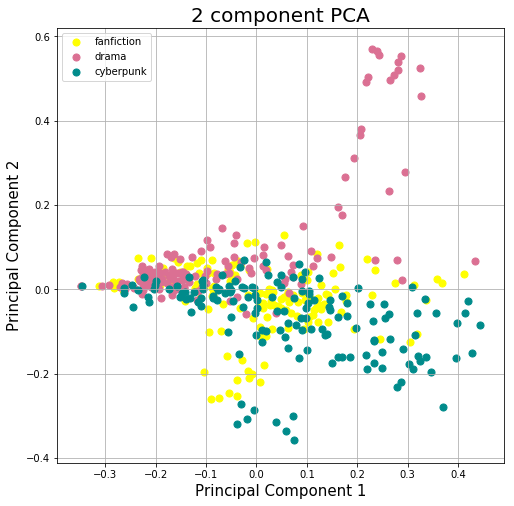

In [91]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['fanfiction', 'drama', 'cyberpunk']
colors = ['yellow', 'palevioletred', 'darkcyan']

for target, color in zip(targets, colors):
    indicesToKeep  = df_new['genre'] == target
    ax.scatter(pca_final.loc[indicesToKeep, 'сomponent 1'], 
               pca_final.loc[indicesToKeep, 'сomponent 2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

### Визуализация документов на плоскости методом t-SNE снижения размерности Bag-of-words векторов

In [85]:
from sklearn.manifold import TSNE

In [86]:
tsne = TSNE(n_components=2).fit_transform(X.todense())

In [87]:
df_tsne = pd.DataFrame(data = tsne, 
                       columns = ['component 1', 'component 2'])

In [88]:
tsne_final = pd.concat([df_tsne, df[['genre']]], axis = 1)

In [89]:
tsne_final.head(15)

,component 1,component 2,genre
0,1.671888,145.039673,fanfiction
1,-30.613043,456.009003,fanfiction
2,434.869720,-77.016197,fanfiction
3,-97.352158,27.055061,fanfiction
4,-184.303818,-131.247406,fanfiction
5,-375.356628,131.538712,fanfiction
6,61.602291,44.511463,fanfiction
7,51.849747,32.893684,fanfiction
8,-297.620178,-108.081955,fanfiction
9,55.415909,480.061646,fanfiction


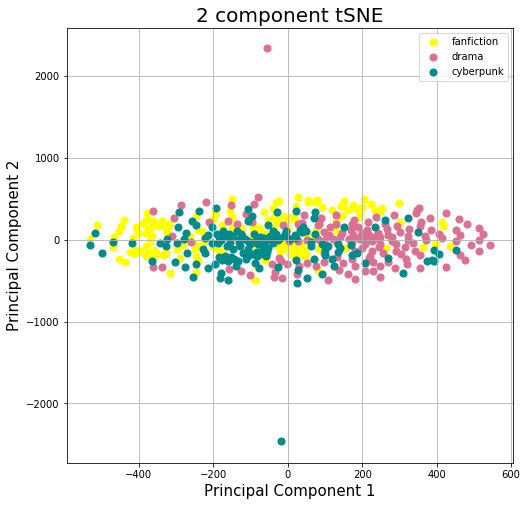

In [90]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component tSNE', fontsize = 20)

targets = ['fanfiction', 'drama', 'cyberpunk']
colors = ['yellow', 'palevioletred', 'darkcyan']

for target, color in zip(targets, colors):
    indicesToKeep = tsne_final['genre'] == target
    ax.scatter(tsne_final.loc[indicesToKeep, 'component 1'],
               tsne_final.loc[indicesToKeep, 'component 2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()